In [3]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from IPython.display import FileLink
from pymatgen.analysis.diffraction.xrd import XRDCalculator

# Récupération de la structure de ZrSiPd

In [4]:
key = "cBffMzOkc37GR0iu9dXW"
material = "mp-961661"
material_name = "ZrSiPd"
with MPRester(key) as m:
    
    #La ligne suivante permet d'étudier la cellule primitive 
    #struct = m.get_structure_by_material_id(material)
    
    #La ligne suivante permet d'étudier la cellule conventionnelle 
    struct = m.get_structure_by_material_id(material,conventional_unit_cell=True)
    
    w = CifWriter(struct)
    w.write_file(material+".cif") 
    print("Il suffit de cliquer sur le lien pour télécharger le fichier .CIF de la cellule conventionnelle.")
    display(FileLink(material+".cif"))

Il suffit de cliquer sur le lien pour télécharger le fichier .CIF de la cellule conventionnelle.


/home/users/p/f/pfranqui/mp-961661.cif

# Définition du diffractogramme 

Nous allons étudier les trois premiers pics du diffractogramme du matériau ZrSiPd pour un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å. Pour ce faire, nous considérons la cellule conventionnelle de ZrSiPd.

Ce rayonnement X incident engendre une figure de diffraction contenant des interférences construcutives ainsi que des interférences destructives. La position des pics du diffractogramme est donnée par la condition de Bragg s'écrivant sous la forme : 

$$n \lambda = 2d_{hkl} \sin \theta$$

où $\theta $ est l'ange de diffraction (angle entre le direction d'incidence et celle d'observation), $n$ l'ordre de la réflexion et $d_{hkl}$ la distance entre deux plans $(h k l)$ consécutifs du réseau direct. 

Chaque pic du diffractogramme est associé à un angle $2\theta$, une intensité $I$, des indices $hkl$ du plan de diffraction correspondant avec leur multiplicité. 


# Diffractogramme de la structure de ZrSiPd

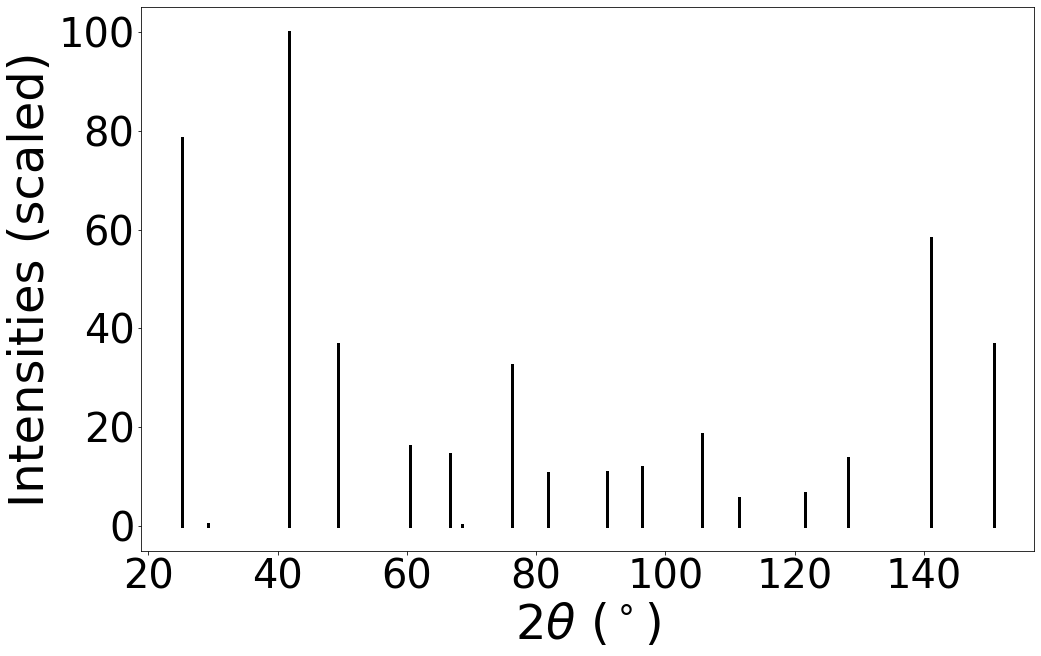

In [5]:
xrd = XRDCalculator(1.54060)
pattern = xrd.get_pattern(struct)
xrd.show_plot(struct, annotate_peaks=False, two_theta_range = [0,180])

# Analyse des trois premiers pics du diffractogramme

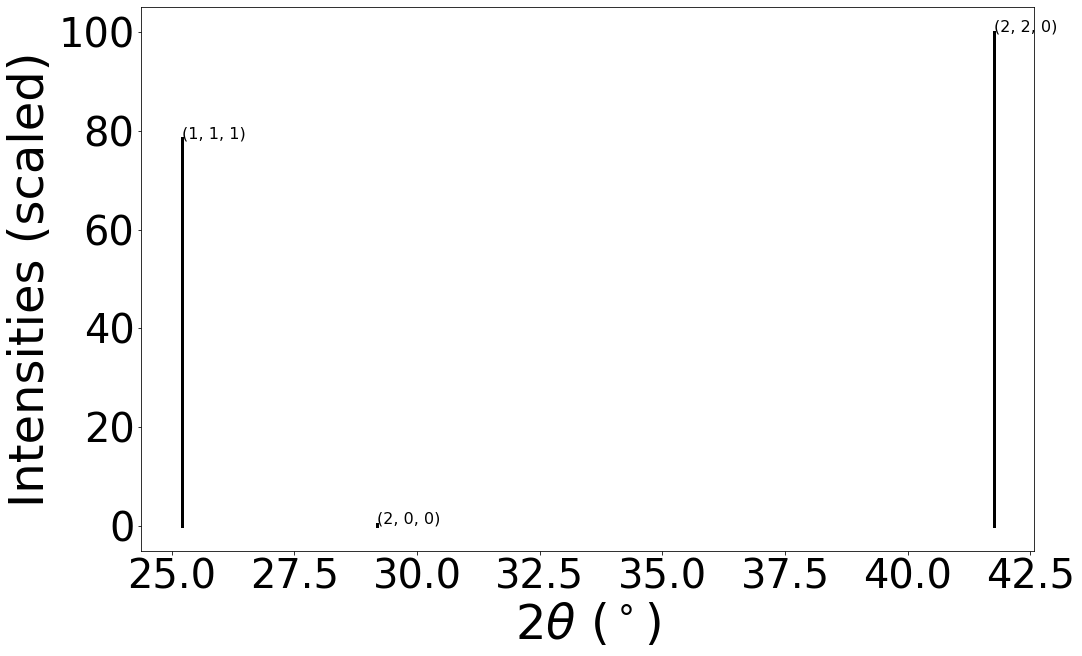

In [6]:
xrd.show_plot(struct, two_theta_range = [0,42])

In [7]:
for i in range(3):
    print("Pic numéro "+str(i+1))
    print("Angle 2Θ associé au pic : "+str(pattern.x[i]))
    print("Intensité du pic : "+str(pattern.y[i]))
    print("Indices hkl du plan associé au pic et sa multiplicité : "+ str(pattern.hkls[i]))
    print(" ")


Pic numéro 1
Angle 2Θ associé au pic : 25.207720568528764
Intensité du pic : 78.46728699699752
Indices hkl du plan associé au pic et sa multiplicité : [{'hkl': (1, 1, 1), 'multiplicity': 8}]
 
Pic numéro 2
Angle 2Θ associé au pic : 29.187765907679953
Intensité du pic : 0.5127530454959304
Indices hkl du plan associé au pic et sa multiplicité : [{'hkl': (2, 0, 0), 'multiplicity': 6}]
 
Pic numéro 3
Angle 2Θ associé au pic : 41.75042331102337
Intensité du pic : 100.0
Indices hkl du plan associé au pic et sa multiplicité : [{'hkl': (2, 2, 0), 'multiplicity': 12}]
 
